In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [2]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [3]:
# Going to use Tesla as the stock I work with

ticker = "TSLA"
start_date = '2017-11-30'
end_date = '2020-11-30'

In [ ]:
stock_date = data.DataReader(ticker, 'iex', start_date, end_date)
print(stock_date.shape)
stock_date.head()

In [2]:
# Try using another aggregation api.

In [1]:
# Need to build out the RSI for this project as well.

In [7]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import yahoo_finance as yf

In [9]:
m = Prophet(weekly_seasonality=False,yearly_seasonality=False)
m.add_seasonality('self_define_cycle',period=8,fourier_order=8,mode='additive')

In [3]:
#import the libraries
import math
import warnings
import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from pandas_datareader import DataReader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM

warnings.filterwarnings("ignore")

In [5]:
#get the stock quote for the past 10 years
stock = input("Enter a stock ticker: ")
num_of_years = 10
start_date = datetime.datetime.now() - datetime.timedelta(days=int(365.25*num_of_years))
end_date = datetime.date.today()

Enter a stock ticker: AAPL


In [6]:
df = DataReader(stock, "yahoo", start_date, end_date)
data = df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset)*.8)

In [7]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-27,11.622857,11.482857,11.530357,11.595715,249816000.0,10.003056
2010-12-28,11.666429,11.609285,11.639643,11.623929,175924000.0,10.027392
2010-12-29,11.658929,11.610714,11.650714,11.617500,163139200.0,10.021846
2010-12-30,11.625357,11.537500,11.624286,11.559286,157494400.0,9.971630
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.937736
...,...,...,...,...,...,...
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005


In [8]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#create the training dataset
train_data = scaled_data[0:train_data_len, :]

#split the data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        #print(x_train)
        #print(y_train)
        print()

#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data to 3 dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

#create test dataset
test_data = scaled_data[train_data_len-60:, :]

#create dataset x_test, y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#convert data to numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/5
1955/1955 [==============================] - 29s 15ms/step - loss: 1.9649e-04 - accuracy: 5.1151e-04
Epoch 2/5
1955/1955 [==============================] - 29s 15ms/step - loss: 9.4036e-05 - accuracy: 5.1151e-04
Epoch 3/5
1955/1955 [==============================] - 28s 14ms/step - loss: 9.5690e-05 - accuracy: 5.1151e-04
Epoch 4/5
1955/1955 [==============================] - 28s 15ms/step - loss: 6.8891e-05 - accuracy: 5.1151e-04
Epoch 5/5
1955/1955 [==============================] - 32s 16ms/step - loss: 5.7204e-05 - accuracy: 5.1151e-04


In [11]:
predictions

array([[ 39.454655],
       [ 39.379333],
       [ 39.65356 ],
       [ 39.70434 ],
       [ 36.352764],
       [ 37.28628 ],
       [ 37.406845],
       [ 37.997337],
       [ 38.577843],
       [ 38.704403],
       [ 38.362892],
       [ 37.829815],
       [ 38.439068],
       [ 38.9243  ],
       [ 39.160942],
       [ 39.377277],
       [ 38.643803],
       [ 38.70175 ],
       [ 38.475952],
       [ 39.541073],
       [ 39.34648 ],
       [ 38.951523],
       [ 41.17952 ],
       [ 41.67438 ],
       [ 41.686382],
       [ 42.7019  ],
       [ 43.453297],
       [ 43.536064],
       [ 42.834377],
       [ 42.686844],
       [ 42.512356],
       [ 42.84475 ],
       [ 42.738525],
       [ 42.859077],
       [ 42.787907],
       [ 42.88766 ],
       [ 43.13558 ],
       [ 42.943996],
       [ 43.335953],
       [ 43.650925],
       [ 43.6939  ],
       [ 43.81032 ],
       [ 43.450726],
       [ 43.822147],
       [ 44.064083],
       [ 44.013424],
       [ 43.786373],
       [ 43.3

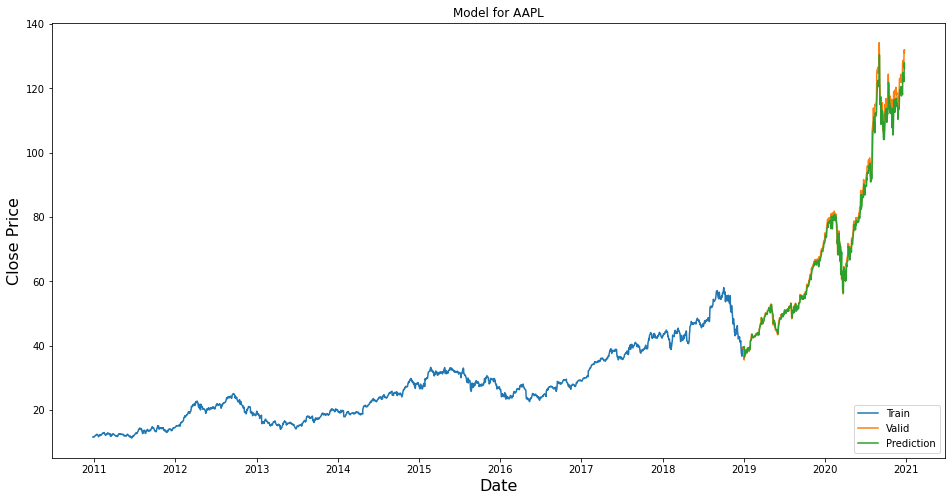

                 Close  Predictions
Date                               
2018-12-28   39.057499    39.454655
2018-12-31   39.435001    39.379333
2019-01-02   39.480000    39.653561
2019-01-03   35.547501    39.704342
2019-01-04   37.064999    36.352764
...                ...          ...
2020-12-18  126.660004   124.478317
2020-12-21  128.229996   122.050339
2020-12-22  131.880005   124.184410
2020-12-23  130.960007   128.013153
2020-12-24  131.970001   126.251396

[503 rows x 2 columns]
The accuracy of the LSTM Model predicting the movement of a stock each day is 47.599999999999994%
     Valid Movement  Predicted Movement
0                 0                   1
1                 0                   0
2                 1                   0
3                 0                   1
4                 1                   0
..              ...                 ...
497               1                   0
498               0                   1
499               0                   0
500       

In [12]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))

#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model for {}'.format(stock.upper()))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Prediction'],loc='lower right')
plt.show()

print (valid)

# find the accuracy based on predicting day-to-day movements 
valid_movement = []
pred_movement = []
close_prices = valid.Close.tolist()
pred_prices = valid.Predictions.tolist()
        
n = 0

for index, value in enumerate(close_prices[:-1]):
    if value > close_prices[index+1]: 
        valid_movement.append(1)
    else:
        valid_movement.append(0)

for index, value in enumerate(pred_prices[:-1]):
    if value > pred_prices[index+1]: 
        pred_movement.append(1)
    else:
        pred_movement.append(0)

for val, pred in zip(valid_movement, pred_movement):
    if val == pred:
        n=n+1
    else:
        pass

total = len(valid_movement)
accuracy = n/total
print (f'The accuracy of the LSTM Model predicting the movement of a stock each day is {100 * round(accuracy, 3)}%')

dataframe = pd.DataFrame(list(zip(valid_movement, pred_movement)), columns =['Valid Movement', 'Predicted Movement'])
print (dataframe)

#get predicted price for next day
last_60day = data[-60:].values
last_60day_scaled = scaler.transform(last_60day)
xx_test = []
xx_test.append(last_60day_scaled)
xx_test = np.array(xx_test)
xx_test = np.reshape(xx_test, (xx_test.shape[0], xx_test.shape[1],1))
pred = model.predict(xx_test)
pred = scaler.inverse_transform(pred)
pred = pred[0]
pred = pred[0]
print("The predicted price for the next trading day is: {}".format(round(pred, 2)))

#get stats
#Root mean squared error 
print (f'The root mean squared error is {round(rmse, 2)}')

error = mean_squared_error(valid['Close'].tolist(), valid['Predictions'].tolist())
print('Testing Mean Squared Error: %.3f' % error)

In [4]:
# Getting IEX data:
import pandas as pd
import pyEX as pyex
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
from env import token

credentials loaded successfully


In [8]:
c = pyex.Client(api_token=token, version='stable')

In [9]:
pyex.chart?

In [13]:
symbol ='AAPL'
timeframe ='1m'
df = c.chartDF(symbol = symbol, timeframe = timeframe)
close_prices = df[['close', 'volume']]

In [14]:
df

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2020-11-30,119.050,120.9700,116.810,116.97,AAPL,169410176,HISTORICAL_PRICES,AAPL,,1606832041000,...,116.810,169410176,116.97,119.050,120.9700,116.810,169410176,"Nov 30, 20",0.000,0.0000
2020-12-01,122.720,123.4693,120.010,121.01,AAPL,128166803,HISTORICAL_PRICES,AAPL,,1606882659000,...,120.010,128166803,121.01,122.720,123.4693,120.010,128166803,"Dec 1, 20",3.670,0.0308
2020-12-02,123.080,123.3700,120.890,122.02,AAPL,89004195,HISTORICAL_PRICES,AAPL,,1607001035000,...,120.890,89004195,122.02,123.080,123.3700,120.890,89004195,"Dec 2, 20",0.360,0.0029
2020-12-03,122.940,123.7800,122.210,123.52,AAPL,78967630,HISTORICAL_PRICES,AAPL,,1607046488000,...,122.210,78967630,123.52,122.940,123.7800,122.210,78967630,"Dec 3, 20",-0.140,-0.0011
2020-12-04,122.250,122.8608,121.520,122.60,AAPL,78260421,HISTORICAL_PRICES,AAPL,,1607134564000,...,121.520,78260421,122.60,122.250,122.8608,121.520,78260421,"Dec 4, 20",-0.690,-0.0056
2020-12-07,123.750,124.5700,122.250,122.31,AAPL,86711990,HISTORICAL_PRICES,AAPL,,1607394454000,...,122.250,86711990,122.31,123.750,124.5700,122.250,86711990,"Dec 7, 20",1.500,0.0123
2020-12-08,124.380,124.9800,123.090,124.37,AAPL,82225512,HISTORICAL_PRICES,AAPL,,1607489280000,...,123.090,82225512,124.37,124.380,124.9800,123.090,82225512,"Dec 8, 20",0.630,0.0051
2020-12-09,121.780,125.9500,121.000,124.53,AAPL,115089193,HISTORICAL_PRICES,AAPL,,1607572082000,...,121.000,115089193,124.53,121.780,125.9500,121.000,115089193,"Dec 9, 20",-2.600,-0.0209
2020-12-10,123.240,123.8700,120.150,120.50,AAPL,81312170,HISTORICAL_PRICES,AAPL,,1607653049000,...,120.150,81312170,120.50,123.240,123.8700,120.150,81312170,"Dec 10, 20",1.460,0.0120


In [15]:
close_prices

,close,volume
date,,
2020-11-30,119.050,169410176
2020-12-01,122.720,128166803
2020-12-02,123.080,89004195
2020-12-03,122.940,78967630
2020-12-04,122.250,78260421
2020-12-07,123.750,86711990
2020-12-08,124.380,82225512
2020-12-09,121.780,115089193
2020-12-10,123.240,81312170


<AxesSubplot:xlabel='date'>

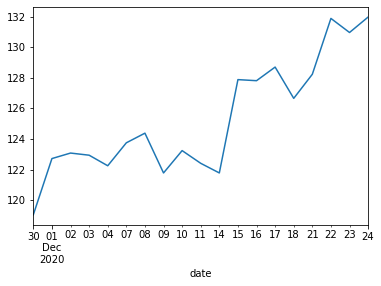

In [17]:
close_prices.close.plot()

<AxesSubplot:xlabel='date'>

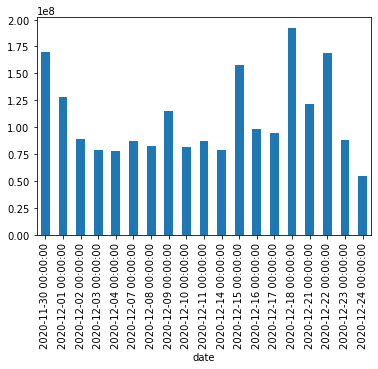

In [19]:
close_prices.volume.plot(kind = 'bar')

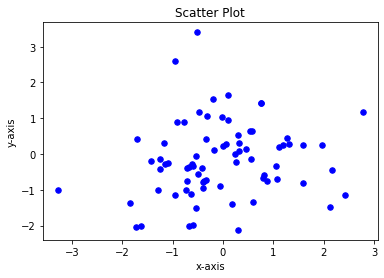

In [27]:
from matplotlib import pyplot as plt
import numpy as np
x = np.random.randn(75)
y = np.random.randn(75)
plt.scatter(x, y, color='b', s=30)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot')
plt.show()

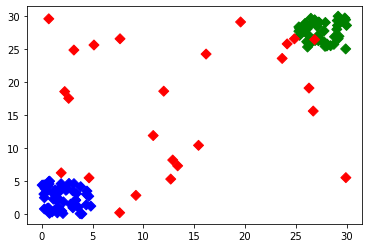

In [28]:
x1 = 5 * np.random.rand(50)

x2 = 5 * np.random.rand(50) + 25

x3 = 30 * np.random.rand(25)

x = np.concatenate((x1, x2, x3))

y1 = 5 * np.random.rand(50)

y2 = 5 * np.random.rand(50) + 25

y3 = 30 * np.random.rand(25)

y = np.concatenate((y1, y2, y3))

color_array = ['b'] * 50 + ['g'] * 50 + ['r'] * 25

plt.scatter(x, y, s=[50], marker='D', c=color_array)

plt.show()

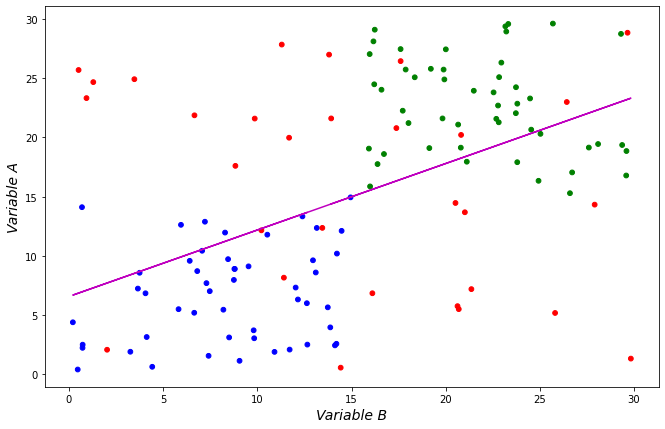

In [49]:
import matplotlib.pylab as plb


plt.figure(figsize = (11, 7))

x1 = 15 * np.random.rand(50)

x2 = 15 * np.random.rand(50) + 15

x3 = 30 * np.random.rand(30)

x = np.concatenate((x1, x2, x3))

y1 = 15 * np.random.rand(50)

y2 = 15 * np.random.rand(50) + 15

y3 = 30 * np.random.rand(30)

y = np.concatenate((y1, y2, y3))

color_array = ['b'] * 50 + ['g'] * 50 + ['r'] * 30

plt.scatter(x, y, s=[90], marker='.', c=color_array)

z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plb.plot(x, p(x), 'm-')
plt.ylabel('Variable A', fontsize = 14, fontstyle = 'italic')
plt.xlabel('Variable B', fontsize = 14, fontstyle = 'italic')
plt.title('', fontsize = 20, fontweight = 'bold')

plt.show()